4.3 Making valid predictions

(a)(b)(c)(d)(e)

In [7]:
# (f)
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from generate_heteroskedastic_sin import generate
from kernel_quantile_fitting import predictKRR, fitQuantileKernel, fitKernelRidge, plotUpperAndLower

In [36]:
alpha = 0.1
tau = 0.1
Lambda = 0.01
delta_low, delta_high = 0.1, 0.9

X_train, y_train = generate()
X_valid, y_valid = generate()
X_test, y_test = generate()

n = X_valid.shape[0]

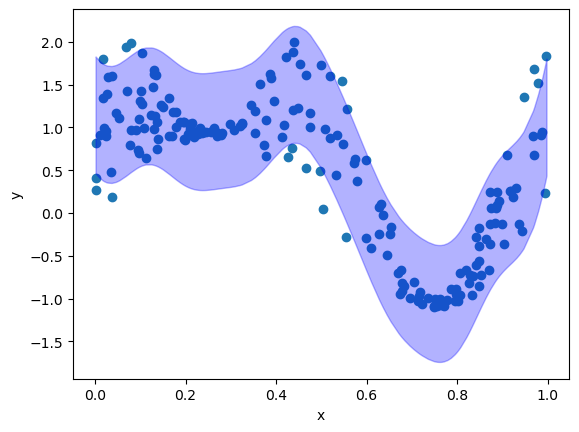

ridge coverage rate: 0.91


In [37]:
beta_hat_ridge = fitKernelRidge(X_train, y_train, lmda=Lambda, tau=tau)
y_hat_valid = predictKRR(X_train, Z=X_valid, beta=beta_hat_ridge, tau=tau)
tau_hat_n = np.quantile(np.abs(y_valid - y_hat_valid), (n+1)/n*(1-alpha))
y_hat_test = predictKRR(X_train, Z=X_test, beta=beta_hat_ridge, tau=tau)
plotUpperAndLower(X_test, y_test, y_low=y_hat_test - tau_hat_n, y_high=y_hat_test + tau_hat_n)
ridge_coverage_rate = np.mean(np.all(np.asarray([y_hat_test - tau_hat_n <= y_test, y_test <= y_hat_test + tau_hat_n]), axis=0))
print("ridge coverage rate:", ridge_coverage_rate)

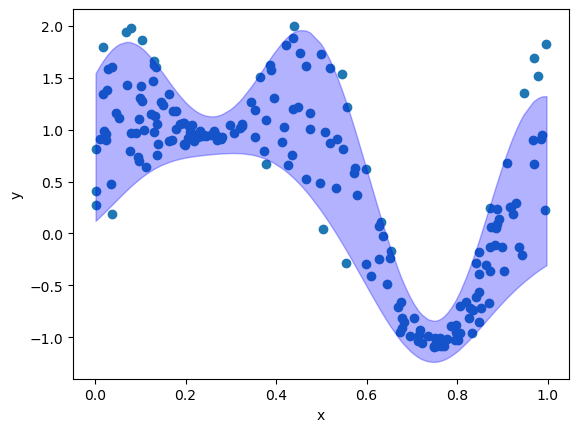

quantile coverage rate: 0.925


In [38]:
beta_hat_low = fitQuantileKernel(X_train, y_train, quantile_level=delta_low, lmda =Lambda, tau=tau)
beta_hat_high = fitQuantileKernel(X_train, y_train, quantile_level=delta_high, lmda =Lambda, tau=tau)
q_low = predictKRR(X_train, Z=X_valid, beta=beta_hat_low, tau=tau)
q_high = predictKRR(X_train, Z=X_valid, beta=beta_hat_high, tau=tau)
Z_scores = np.max(np.array([q_low - y_valid, y_valid - q_high]), axis=0)
tau_hat_n = np.quantile(Z_scores, (n+1)/n*(1-alpha))
y_hat_low = predictKRR(X_train, Z=X_test, beta=beta_hat_low, tau=tau)
y_hat_high = predictKRR(X_train, Z=X_test, beta=beta_hat_high, tau=tau)
plotUpperAndLower(X_test, y_test, y_low=y_hat_low - tau_hat_n, y_high=y_hat_high + tau_hat_n)
quantile_coverage_rate = np.mean(np.all(np.array([y_hat_low - tau_hat_n <= y_test, y_test <= y_hat_high + tau_hat_n]), axis=0))
print("quantile coverage rate:", quantile_coverage_rate)